# COMPSCI 371 Homework 1

_**Group Members:**_ Mayur Sekhar, Rithvik Neti, Jai Kasera

### Problem 0 (3 points)

## Part 1: Problems in Machine Learning

### Problem 1.1

Find the total amount of pixels:

$1000_{pixels} \cdot 1000_{pixels} = 1000000_{pixels} $

Find the total amount of possibilities per pixel:

$256_{values \, per \, byte}  \cdot 256_{values \, per \, byte} \cdot 256_{values \, per \, byte} = 2^8 \cdot 2^8 \cdot 2^8 = 2^{24}_{values \, per \, pixel}$

Solve for $i$:

$i = (2^{24})^{1000000} = 2^{24000000}$

Convert to base 10:

$2^{24000000} = 10^{24000000 \cdot \log_{10}{2}}$

$\log_{10}{2} = \approx 0.301$

$24000000 \cdot 0.301 \approx 7200000$

$i = 10^{7200000}$

The number $i$ of possible images is $10^{7200000}$.

Givens:

$e = 14300000000000 = 1.43 \cdot 10^{13} \approx 10^{13}$

$a = 10^{80}$

$s = 27$ petabytes = $2.7 \cdot 10^{16}$ bytes of storage for Google

If Google used all its current storage just for images, and if all images had the format above, would Google be able to store all  $e$ images in existence today, without using any image compression methods?

One small image has $1000000$ pixels which have $3$ bytes of data each which means that the small image as a whole takes $3000000$ bytes of data to be stored. If $e$ is the total amount of photographs in existance then $e \cdot 3000000$ would Google be the total amount of storage needed to store all the photographs in existence without any image compression methods. 

$t = e \cdot 3000000 = 4.29 \cdot 10^{19}$

The amount of storage that it would take to store all the photographs in existance wihtout any compression method is expressed above ($t$) and since it is greater than the amount of storage Google has ($t > s$), Google would not be able to store all the photographs in existence without any image compression methods.

Is it possible to store $i$ images, if all of humanity's resources were devoted to this useless task? Can aliens help achieve this goal in this universe? 

No, it would not be possible to store $i$ images regardless if all of humanity's resources were devoted to the task, nor would aliens be able to achieve this goal as even if each image $i$ was the size of an atom $i$ images is still to big to fit in the universe ($i > a$).

### Problem 1.2 (Exam Style)

Is this a (i) supervised but not semi-supervised; (ii) semi-supervised; or (iii) unsupervised machine learning problem?

Supervised but not semi-supervised

Is the predictor a classifier or a regressor?

Regressor

### Problem 1.3 (Exam Style)

Is this a (i) supervised but not semi-supervised; (ii) semi-supervised; or (iii) unsupervised machine learning problem?

Supervised but not semi-supervised

Is the predictor a classifier or a regressor?

Classifier

### Problem 1.4

In [101]:
import urllib.request
import ssl
from os import path as osp
import shutil
import numpy as np
import matplotlib.pyplot as plt 


def retrieve(file_name, semester='fall24', homework=1):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [102]:
import pickle

# retrieve is defined in a hidden cell

file_name = 'points.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    points = pickle.load(file)

sigma, min_size = 2, 5

Using previously downloaded file points.pkl


In [103]:
import math 
def euclidean_distance(point, points):
    return np.linalg.norm(points - point, axis=1)
    
def ind(arrlist, array):
    for i, arr in enumerate(arrlist):
        if np.all(arr == array):
            return i
    return -1

def step(m, t, sigma):
    denom_sum = sum([math.exp(-np.linalg.norm(point - m)**2 / (2 * sigma**2)) for point in t])
    
    weighted_mean = np.zeros_like(m)
    for point in t:
        dist_squared = np.linalg.norm(point - m)**2
        weight_factor = math.exp(-dist_squared / (2 * sigma**2)) / \
        denom_sum
        weighted_mean += weight_factor * point
    
    return weighted_mean   

def seek(m_old, t, sigma, max_iter=100):
    m_new = m_old
    for i in range(max_iter):
        m_old = m_new
        m_new = step(m_old, t, sigma)
        if((np.linalg.norm(m_old - m_new)) > (sigma / 10)):
            m_new = step(m_old, t, sigma)
        else:
            break
    return m_new

def cluster(t, sigma, min_size):
    m = []
    for i in range(0, len(t)):
        m.append(seek(t[i], t, sigma))
    centroids = [m[0]]  
    cluster_members = [[t[0]]]

    for i in range(1, len(t)):
        
        close_centroid_idx = np.argmin([np.linalg.norm(c - m[i]) \
                                        for c in centroids])
        close_centroid = centroids[close_centroid_idx]

        if np.linalg.norm(close_centroid - m[i]) < (sigma):
            centroids[close_centroid_idx] = \
            (centroids[close_centroid_idx] + m[i]) / 2
            cluster_members[close_centroid_idx].append(t[i])
        else:
            centroids.append(m[i])
            cluster_members.append([t[i]])

    valid_cents = []
    valid_mems = []
    for i, mems in enumerate(cluster_members):
        if len(mems) >= min_size:
            valid_cents.append(centroids[i])
            valid_mems.append(mems)

    return valid_cents, valid_mems

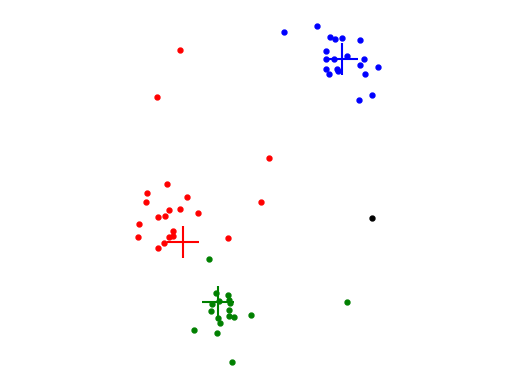

In [104]:

colors = ['red', 'blue', 'green', 'red', 'blue', \
          'green', 'red', 'blue', 'green', 'red', 'blue', 'green']



clusters, pointss = cluster(points, sigma, min_size)
counter = 0 

for i, mode in enumerate(clusters):
    cul = colors[i]
    plt.scatter(mode[0], mode[1], color = cul, marker='+', s=500)
    counter+=1

for i, clus in enumerate(pointss):
    cul = colors[i]
    for point in clus:
        plt.scatter(point[0], point[1], color = cul, marker=".", s=50)
    counter+=1
merge = sum(pointss, [])

for point in points:
    if not any(np.array_equal(point, m) for m in merge):
        plt.scatter(point[0], point[1], marker=".", s=50, color='black')

plt.axis('equal')
plt.axis('off')
plt.show()

## Part 2: Voronoi Diagrams

### Problem 2.1 (Exam Style)

a) The line $l_{pq}$ is the perpendicular bisector to the line that connects point $\textbf{p}$ to point $\textbf{q}$  ($\overline{pq}$).

b) The Voronoi vertex $\textbf{v}$ is the circumcenter of the triangle that can be drawn by connections points $\textbf{p}$, $\textbf{q}$, and $\textbf{r}$ ($\triangle\textbf{pqr}$). This means that $\textbf{v}$ is equidistant from each of the pointsof the triangle ($\textbf{p}$, $\textbf{q}$, and $\textbf{r}$) and is the intersection point of the perpendicular bisectors of each of lines of the triangle ($\overline{pq}$, $\overline{qr}$, and $\overline{rp}$).

c) There would no longer be a Voronoi vertex $\textbf{v}$ is $\textbf{r}$ was moved to the midpoint between $\textbf{p}$ and $\textbf{q}$ ($\textbf{r'}= (\textbf{p}+\textbf{q}/2)$ because there would now only be two perpendicular bisectors between $\overline{qr}$ and $\overline{rp}$. Essentially there would be lines on either side of the new $\textbf{r}$ but they would be parallel and thus never intersect to cause a Voronoi vertex.

### Problem 2.2 (Exam Style)

Find the slope of the line $l_{pq}$: 

$m = - \frac{q_0 - p_0}{q_1 - p_1}$

Find the midpoint between $p$ and $q$:

$b_0 = \frac{(p_0 + q_0)}{2}$

$b_1 = \frac{(p_1 + q_1)}{2}$

Write the line $l_{pq}$ in point-slope form with $m$ as the slope:

$x_1 - b_1 = -\frac{q_0 - p_0}{q_1 - p_1} (x_0 - b_0)$

Multiply both sides by $q_1 - p_1$:

$(q_1 - p_1) (x_1 - b_1) = - (q_0 - p_0) (x_0 - b_0)$

Distribute:

$(q_1 - p_1) x_1 - (q_1 - p_1) b_1 = - (q_0 - p_0) x_0 + (q_0 - p_0) b_0$

Rearrange to put $x_0$ and $x_1$ on the same side:

$(q_1 - p_1) x_1 + (q_0 - p_0) x_0 = (q_1 - p_1) b_1 + (q_0 - p_0) b_0$

$(q_0 - p_0) x_0 + (q_1 - p_1) x_1  - ((q_1 - p_1) b_1 + (q_0 - p_0) b_0) = 0$

$(q_0 - p_0) x_0 + (q_1 - p_1) x_1  - ((q_1 - p_1) (\frac{(p_1 + q_1)}{2}) + (q_0 - p_0)(\frac{(p_0 + q_0)}{2})) = 0$

$(q_0 - p_0) x_0 + (q_1 - p_1) x_1  - (\frac{(q_1^2 - p_1^2)}{2} + \frac{(q_0^2 - p_0^2)}{2})$

Match coefficients with line equation $a_0 x_0 + a_1 x_1 + a_2 = 0$:

$a_0 = q_0 - p_0$

$a_1 = q_1 - p_1$

$a_2 = - (\frac{(q_1^2 - p_1^2)}{2} + \frac{(q_0^2 - p_0^2)}{2})$

$\therefore a_0, a_1,$ and $a_2$ satisfy $a_0 x_0 + a_1 x_1 + a_2 = 0$

### Problem 2.3

In [105]:
def edge(p, q):
    
    a = [q[0] - p[0], q[1] - p[1], -((1/2) * (q[1]**2 - p[1]**2) \
                                     + (1/2) * (q[0]**2 - p[0]**2))]
    return np.array(a)

In [106]:
def vertex(p, q, r):
    a0,a1,a2 = edge(p,q) 
    b0,b1,b2 = edge(p,r) 
    #Only need 2 lines, since triangle 
    x1 = ((a2*b0) - (a0*b2))/((-a1*b0) + (a0*b1))
    x0 = (-b2-(b1*(x1)))/b0
    #Math done separately 
    return np.array([x0,x1]) 


    
   


In [107]:
p = (0, 0)
q = (1, 0)
r = (0.3, 0.8)
with np.printoptions(precision=3):
    print("line coefficents for pq: " + str(edge(p, q)))
    print("line coefficents for qr: " + str(edge(q, r)))
    print("line coefficents for rp: " + str(edge(r, p)))
    print("Voronoi vertex: " + str(vertex(p, q, r)))



line coefficents for pq: [ 1.   0.  -0.5]
line coefficents for qr: [-0.7    0.8    0.135]
line coefficents for rp: [-0.3   -0.8    0.365]
Voronoi vertex: [0.5   0.269]


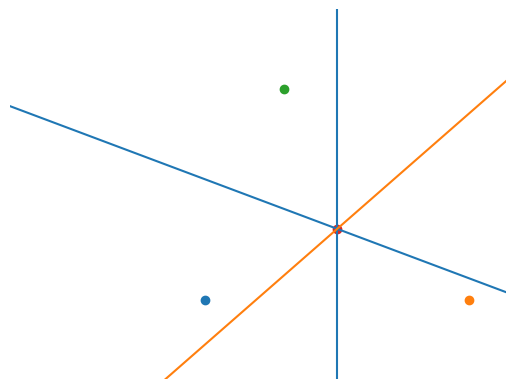

In [108]:
for x,y in (p,q,r):
    plt.scatter(x,y) 
pq, pr, rq = edge(p,q), edge(p,r), edge(r,q)

x = np.linspace(-10, 10, 2)
if pq[1] == 0:
    plt.axvline(x=-pq[2] / pq[0])
else:
    plt.plot(x, (-pq[2] - pq[0] * x) / pq[1])
if pr[1] == 0:
    plt.axvline(x=-pr[2] / pq[0])
else:
    plt.plot(x, (-pr[2] - pr[0] * x) / pr[1])
if rq[1] == 0:
    plt.axvline(x=-rq[2] / rq[0])
else:
    plt.plot(x, (-rq[2] - rq[0] * x) / rq[1])

vert = vertex(p,q,r) 
plt.scatter(vert[0], vert[1])



plt.axis('equal')
plt.axis('off')
plt.xlim(-0.5,0.9)
plt.ylim(-0.3,1.1)

plt.show()

## Part 3: Nearest-Neighbor Classification 

In [109]:
pumpkin_file_name = 'pumpkin.pkl'
retrieve(pumpkin_file_name)
with open(pumpkin_file_name, 'rb') as file:
    p = pickle.load(file)

Using previously downloaded file pumpkin.pkl


### Problem 3.1: Standardization

In [110]:
def calc_stats(d): 
    means = np.mean(d, axis=0)
    stds = np.std(d, axis=0)
    return means, stds 

In [111]:
training = p.train.x 
validate = p.validate.x
test = p.test.x

rows, cols = training.shape[0], training.shape[1]

means = np.mean(training, axis=0)
stds = np.std(training, axis=0)

for data_set in (training, validate, test):
    data_set -= means
    data_set /= stds


training_stats, validate_stats, test_stats = \
calc_stats(training), calc_stats(validate), calc_stats(test)

with np.printoptions(precision=2, suppress=True):
    print('Training set:')
    print('\tmeans: {}'.format(training_stats[0]))
    print('\tstds: {}'.format(training_stats[1]))
with np.printoptions(precision=2, suppress=True):
    print('Validation set:')
    print('\tmeans: {}'.format(validate_stats[0]))
    print('\tstds: {}'.format(validate_stats[1]))
with np.printoptions(precision=2, suppress=True):
    print('Test set:')
    print('\tmeans: {}'.format(test_stats[0]))
    print('\tstds: {}'.format(test_stats[1]))


Training set:
	means: [ 0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0.  0.]
	stds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation set:
	means: [-0.06 -0.06 -0.06 -0.02 -0.06 -0.06 -0.05 -0.04 -0.04  0.02 -0.02  0.03]
	stds: [0.99 0.99 1.01 1.04 0.99 0.99 1.09 1.14 1.04 1.05 1.05 1.06]
Test set:
	means: [-0.05 -0.05 -0.06 -0.   -0.05 -0.05 -0.05 -0.01 -0.06  0.02 -0.03  0.04]
	stds: [0.96 0.94 0.93 1.08 0.96 0.97 1.08 0.81 1.02 0.98 1.01 1.02]


### Problem 3.2: Validation

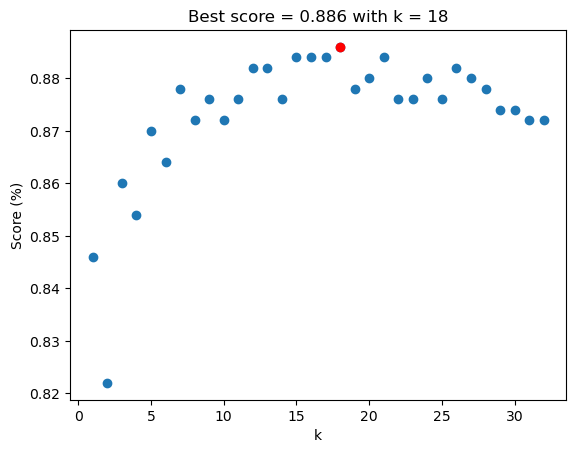

In [112]:
from sklearn.neighbors import KNeighborsClassifier
maxScore = [0,0]
scores = [] 
for k in range (1,33): 
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit(p.train.x, p.train.y)
    score = knn.score(p.validate.x, p.validate.y) 
    scores.append(score) 
    if score > maxScore[0]:
        maxScore[0] = score
        maxScore[1] = k 

plt.scatter(list(range(1,33)), scores)
plt.scatter(maxScore[1], maxScore[0], color="red")
plt.title(f'Best score = {maxScore[0]:.3f} with k = {maxScore[1]}')
plt.xlabel('k')
plt.ylabel('Score (%)')
plt.show()

### Problem 3.3: Testing

In [113]:
best_model = KNeighborsClassifier(n_neighbors = maxScore[1])
best_model.fit(p.train.x, p.train.y) 
score = knn.score(p.test.x, p.test.y)
print(f'Accuracy on p.test = {score:.3f} with k = {maxScore[1]}')

Accuracy on p.test = 0.866 with k = 18


### Problem 3.4: Analysis (Exam Style)

Compare the validation and test accuracy you obtained for the best predictor in the last two problems. Is the difference large, in your judgement?

The accuracy on the validation set was 0.886, while the accuracy on the test set was 0.866. In our judgement, this difference of 0.220 is not large relative to the two values.

Why are the two values in the order they are, rather than in the reverse order?

The accuracy on the validation set was slightly greater than that of the test set because the validation set was used to find the best value of k. We then used this value of k on the test set, even though there might exist a different value of k that would perform better on the test set. 

What does the discrepancy between the two values tell you about the training, validation, and test sets? Can you think of ways to improve these sets so that the two accuracy measures are likely to become closer?

This discrepancy tells us that the validation set generalizes pretty well to the test set. If there was a large discrepancy between the accuracy on the validation set and test set, this could mean that the two sets have very different characteristics. In this example, the discrepancy was small which indicated that the validation set was a good representation of the test set.

There are a few ways to possibly improve these sets so that the two accuracy measures are likely to become closer. K-fold cross validation could be done to get a more accurate estimate since we would be averaging the model performance over different validation folds. It is also important to make sure that the size of the validation set and test set are large enough, which would help make the data distributions of both the sets more similar. 